In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [1]:
%load_ext autoreload
%autoreload 2

In [80]:
data = pd.read_csv('data/preprocessed.csv')

In [81]:
data.head()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
0,1.281177,4.010300,3.717485,18.606655,24.497320,9.705954,1.572348,2.395472,-0.606519,-0.111153,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.716499,4.010300,3.717485,12.832655,17.435446,9.705954,1.572348,4.017763,-0.797582,1.021773,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.192871,3.719906,3.553477,19.985520,12.359725,9.705954,3.146405,4.017763,-0.606519,0.342017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.410532,3.574710,3.389468,17.141610,15.228611,7.206431,3.146405,2.395472,-0.797582,-1.448006,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.410532,3.574710,3.225459,15.590386,14.566560,7.206431,1.572348,2.395472,-0.606519,0.115432,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
y = data['Value']

In [83]:

X = data.drop([
    'Value',
    'Wage',
    'Release Clause',
], axis=1)

In [ ]:
def fit_model_cross_validation(model_supplier):
    

In [84]:
def fit_model(model_supplier):
    errors = []
    for epoch in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model = model_supplier()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        errors.append(mse)
    return sum(errors) / len(errors)

In [85]:
fit_model(lambda: SGDRegressor())

0.35942068058056187

In [86]:
fit_model(lambda: SGDRegressor(l1_ratio=0.5))

0.35635827422510336

In [87]:
fit_model(lambda: SGDRegressor(penalty='l1'))

0.3479963348405644

In [88]:
fit_model(lambda: SGDRegressor(learning_rate='adaptive'))

0.30838813792086406

In [89]:
fit_model(lambda: SGDRegressor(learning_rate='adaptive', eta0=0.01))

0.3212804445024532

In [90]:
fit_model(lambda: SGDRegressor(learning_rate='adaptive', eta0=0.01, penalty='l1'))

0.2909370763744846

In [91]:
fit_model(lambda: SGDRegressor(learning_rate='adaptive', eta0=0.01, penalty='l1', l1_ratio=0.5))

0.33066491705489304

In [92]:
coefs = SGDRegressor(learning_rate='adaptive', eta0=0.01, penalty='l1').fit(X, y).coef_

In [93]:
coefs = pd.Series(coefs, index=X.columns, name='coef')

In [94]:
coefs[coefs != 0].sort_values(ascending=False, key=abs)

Club_Real Madrid         2.288612
Body Type_Neymar         2.155534
Club_Manchester City     2.145934
Club_FC Barcelona        2.025629
Club_Juventus            1.973812
                           ...   
Club_Bolton Wanderers   -0.001516
Club_CD Numancia        -0.000523
Club_Rotherham United   -0.000257
Club_Grenoble Foot 38    0.000071
Club_Carpi               0.000053
Name: coef, Length: 497, dtype: float64

In [137]:
df_no_clubs = data.drop([
    *filter(lambda x: 'Club' in x, data.columns),
], axis=1)
    

In [138]:
y_no_clubs = df_no_clubs['Value']
X_no_clubs = df_no_clubs.drop([
    'Value',
    'Wage',
    'Release Clause',
], axis=1)

In [139]:
def fit_model_no_clubs(model_supplier):
    errors = []
    for epoch in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X_no_clubs, y_no_clubs, test_size=0.2)
        model = model_supplier()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        errors.append(mse)
    return sum(errors) / len(errors)

In [140]:
fit_model(lambda: SGDRegressor())

0.3493658525349342

In [141]:
fit_model(lambda: SGDRegressor(l1_ratio=0.5))

0.34970638172029045

In [142]:
fit_model(lambda: SGDRegressor(penalty='l1'))

0.307357195579128

In [143]:
fit_model(lambda: SGDRegressor(learning_rate='adaptive'))

0.31344129546378136

In [144]:
fit_model(lambda: SGDRegressor(learning_rate='adaptive', eta0=0.01))

0.3111816607076924

In [145]:
fit_model(lambda: SGDRegressor(learning_rate='adaptive', eta0=0.01, penalty='l1'))

0.3078425324750679

In [146]:
fit_model(lambda: SGDRegressor(learning_rate='adaptive', eta0=0.01, penalty='l1', l1_ratio=0.5))

0.31735480580076814

In [95]:
from sklearn.tree import DecisionTreeRegressor

fit_model(lambda: DecisionTreeRegressor())

0.04436731455545777

In [96]:
fit_model(lambda: DecisionTreeRegressor(max_depth=5))

0.07699935020786197

In [97]:
fit_model(lambda: DecisionTreeRegressor(max_depth=10))

0.04376566565831769

In [98]:
fit_model(lambda: DecisionTreeRegressor(max_depth=5, min_samples_split=10))

0.06430585755044939

[Text(0.5, 0.9166666666666666, 'Overall <= 2.05\nsquared_error = 1.0\nsamples = 14742\nvalue = 0.0'),
 Text(0.25, 0.75, 'Overall <= 1.034\nsquared_error = 0.249\nsamples = 14388\nvalue = -0.116'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'Overall <= 0.453\nsquared_error = 0.034\nsamples = 12575\nvalue = -0.273'),
 Text(0.0625, 0.4166666666666667, 'Overall <= -0.273\nsquared_error = 0.004\nsamples = 10088\nvalue = -0.346'),
 Text(0.03125, 0.25, 'Overall <= -0.999\nsquared_error = 0.001\nsamples = 5758\nvalue = -0.384'),
 Text(0.015625, 0.08333333333333333, 'squared_error = 0.0\nsamples = 2247\nvalue = -0.412'),
 Text(0.046875, 0.08333333333333333, 'squared_error = 0.001\nsamples = 3511\nvalue = -0.366'),
 Text(0.09375, 0.25, 'Potential <= -0.301\nsquared_error = 0.003\nsamples = 4330\nvalue = -0.296'),
 Text(0.078125, 0.08333333333333333, 'squared_error = 0.001\nsamples = 2370\nvalue = -0.33'),
 Text(0.109375, 0.08333333333333333, 'squared_error = 0.0

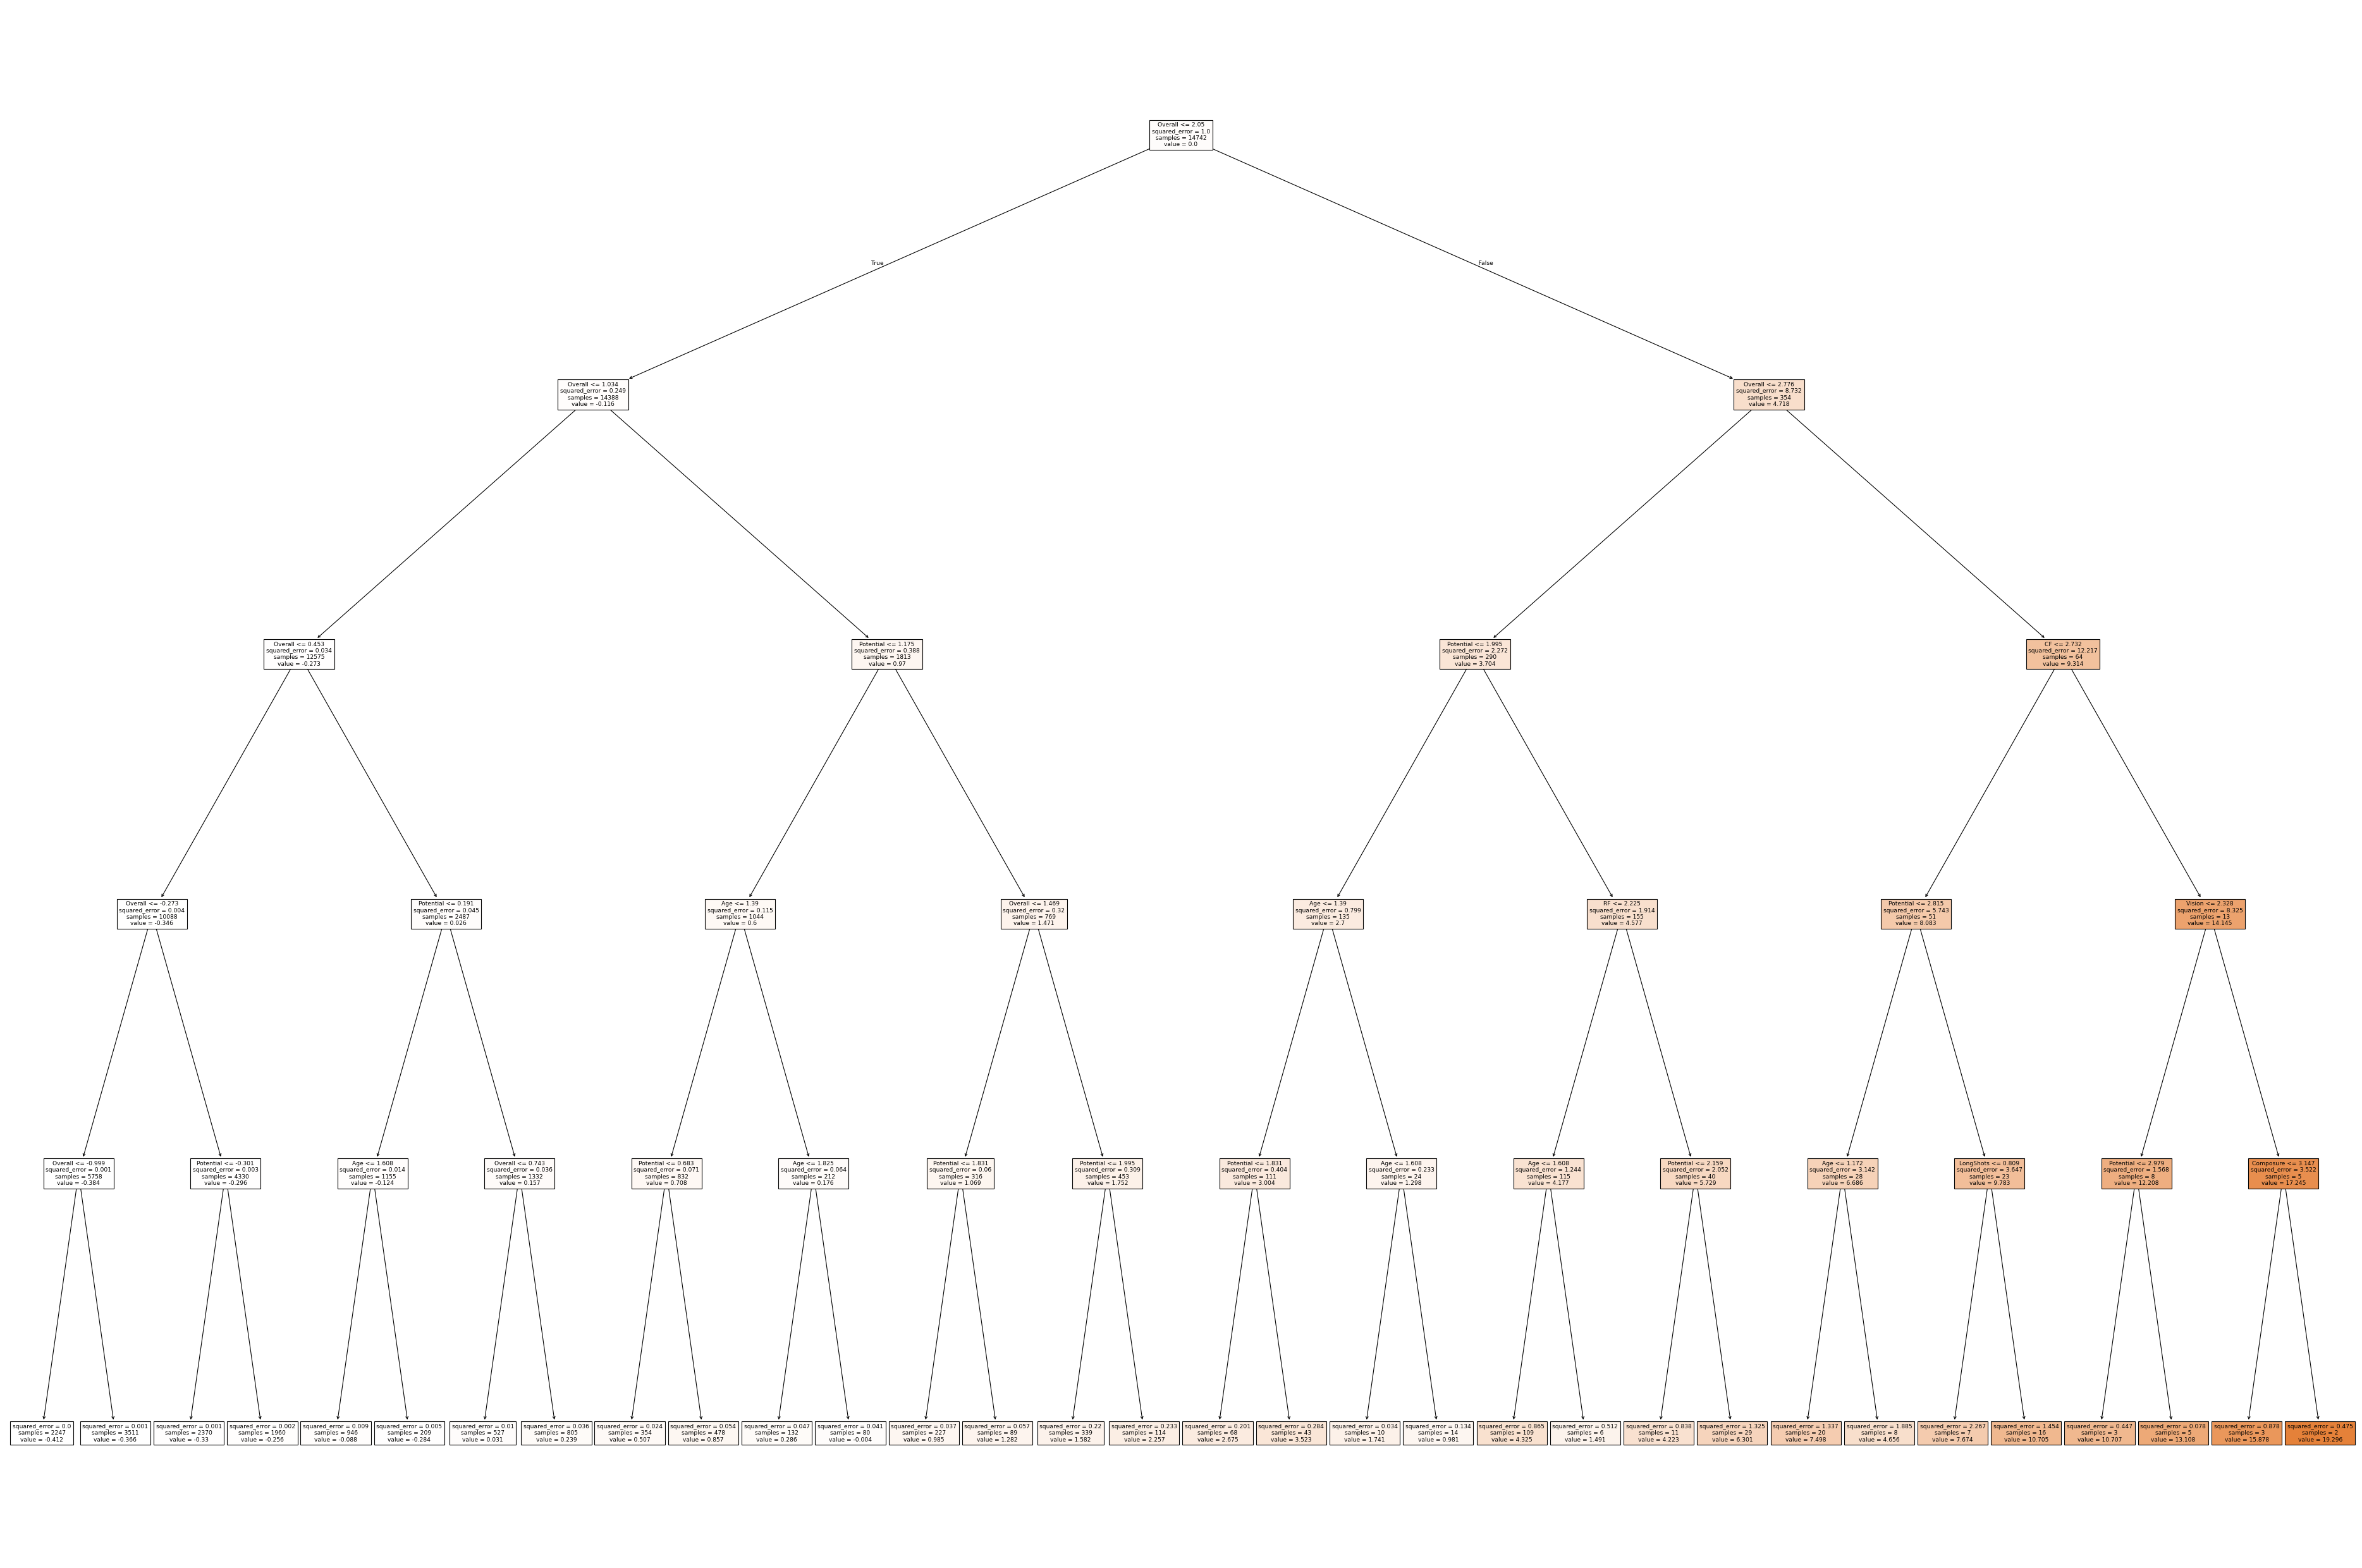

In [155]:
from matplotlib.pyplot import figure
from sklearn.tree import plot_tree
figure(num=None, figsize=(60, 40), dpi=80, facecolor='w', edgecolor='k')
plot_tree(DecisionTreeRegressor(max_depth=5).fit(X, y), feature_names=X.columns, filled=True)


In [111]:
m = DecisionTreeRegressor(max_depth=5).fit(X, y)

In [113]:
from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(m, out_file=None, 
                                feature_names=X.columns,  
                                class_names=y,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.

'tree.png'

In [124]:
df2 = pd.read_csv('data/preprocessed_no_scale.csv')

In [125]:
y_no_prep = df2['Value']
X_no_prep = df2.drop([
    'Value',
    'Wage',
    'Release Clause',
], axis=1)

In [134]:
import re
import pyperclip
import sklearn.tree

def view_tree(m, X_, y_):
    v = (tree.export_text(m, feature_names=X_.columns, class_names=y_))
    
    # transform [value] to millions, thousands, etc.
    v = re.sub(r'\[(\d+.\d+)\]', lambda x: f'{float(x.group(0)[1:][:-1]) / 1000000:.2f}M' if float(x.group(0)[1:][:-1]) > 1000000 else f'{float(x.group(0)[1:][:-1]) / 1000:.2f}K', v)
    
    pyperclip.copy(v)
    print(v)

In [135]:
view_tree(DecisionTreeRegressor(max_depth=5).fit(X_no_prep, y_no_prep), X_no_prep, y_no_prep)

|--- Overall <= 80.50
|   |--- Overall <= 73.50
|   |   |--- Overall <= 69.50
|   |   |   |--- Overall <= 64.50
|   |   |   |   |--- Overall <= 59.50
|   |   |   |   |   |--- value: 154.05K
|   |   |   |   |--- Overall >  59.50
|   |   |   |   |   |--- value: 423.83K
|   |   |   |--- Overall >  64.50
|   |   |   |   |--- Potential <= 69.50
|   |   |   |   |   |--- value: 632.66K
|   |   |   |   |--- Potential >  69.50
|   |   |   |   |   |--- value: 1.06M
|   |   |--- Overall >  69.50
|   |   |   |--- Potential <= 72.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- value: 2.04M
|   |   |   |   |--- Age >  32.50
|   |   |   |   |   |--- value: 898.80K
|   |   |   |--- Potential >  72.50
|   |   |   |   |--- Overall <= 71.50
|   |   |   |   |   |--- value: 2.72M
|   |   |   |   |--- Overall >  71.50
|   |   |   |   |   |--- value: 3.93M
|   |--- Overall >  73.50
|   |   |--- Potential <= 78.50
|   |   |   |--- Age <= 31.50
|   |   |   |   |--- Potential <= 75.50
|   |   |   

In [136]:
X_no_overall = X_no_prep.drop([
    'Overall',
], axis=1)

view_tree(DecisionTreeRegressor(max_depth=5).fit(X_no_overall, y_no_prep), X_no_overall, y_no_prep)

|--- RAM <= 77.50
|   |--- Reactions <= 71.50
|   |   |--- CF <= 68.50
|   |   |   |--- LCB <= 70.50
|   |   |   |   |--- BallControl <= 67.50
|   |   |   |   |   |--- value: 559.39K
|   |   |   |   |--- BallControl >  67.50
|   |   |   |   |   |--- value: 1.52M
|   |   |   |--- LCB >  70.50
|   |   |   |   |--- Potential <= 75.50
|   |   |   |   |   |--- value: 3.02M
|   |   |   |   |--- Potential >  75.50
|   |   |   |   |   |--- value: 6.52M
|   |   |--- CF >  68.50
|   |   |   |--- Potential <= 73.50
|   |   |   |   |--- Potential <= 71.50
|   |   |   |   |   |--- value: 1.84M
|   |   |   |   |--- Potential >  71.50
|   |   |   |   |   |--- value: 3.01M
|   |   |   |--- Potential >  73.50
|   |   |   |   |--- LF <= 71.50
|   |   |   |   |   |--- value: 4.97M
|   |   |   |   |--- LF >  71.50
|   |   |   |   |   |--- value: 7.99M
|   |--- Reactions >  71.50
|   |   |--- Potential <= 81.50
|   |   |   |--- Potential <= 75.50
|   |   |   |   |--- Potential <= 72.50
|   |   |   |   |   

In [147]:
from sklearn.svm import SVR

In [148]:
fit_model(lambda: SVR())

0.15789649945021123

In [150]:
svr = SVR()
svr.fit(X, y)

SVR()

In [151]:
svr.coef_


AttributeError: coef_ is only available when using a linear kernel

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}